## Does Money buy Championships? How have the Highest spending teams performed over time

#### Visualizing The Data

We were able to use Apache Spark to Extract the Data needed to answer our questions related to the Highest Spending Teams after 1984. We can now visualize the data, so it is easier to see trends in it. We used Apache Spark to export data to pandas data frames, and csv files. We can now visualize these dataframes using plot functionality built into pandas, that is based on matplotlib.  

In [442]:
# Import the necessary libraries to visualize a pandas data frame
# Read the raw data from csv files

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#### Extract Information we wish to Visualize
Our Dataframe contains a lot of information about the Top Spending Teams in Major League Baseball. However we only wish to visualize the Number of Wins each one of these teams obtained. We filter the data for the columns we wish to visualize.

In [443]:
# Read in the Data file that contains the Data we wish to visualize, and filter it for the columns that need visualization

df = pd.read_csv('spark_question2_top_spender.csv', index_col=1)
df_raw = (df.filter(items=['year', 'teamID', 'W']))

#print (df_raw)

In [444]:
# Read in the Data file that contains the Data we wish to visualize, and filter it for the columns that need visualization

df_ws_raw = pd.read_csv('spark_question2_ws_winner.csv', index_col=1)
df_ws = (df_ws_raw.filter(items=['year', 'teamID', 'W', 'yearRank']))



In [445]:
# Read in the Data file that contains the Data we wish to visualize, and filter it for the columns that need visualization

df_avg = pd.read_csv('spark_question2_avg_sal_wins.csv', index_col=1)

#### Bar Chart Showing number of Wins for the Top Spending Team in the League, after 1984
Our pandas dataframe contains Information about the Top Spending Team in Major League Baseball every year after 1984. We filter the Year, and the number of Team Wins from our pandas dataframe. We then plot a bar chart showing the Number of wins achieved by the Top Ranked team after 1984. A Typical baseball season is 162 games. A measure of a good season is one having surpassed 90 wins. Lets take a look at the number of times the Top Spending team in the league achieved at least 90 wins (after 1984). After 1984, the Top spending team in the league has exceeded 90 wins a total of 18 times. This equates to 56.25%

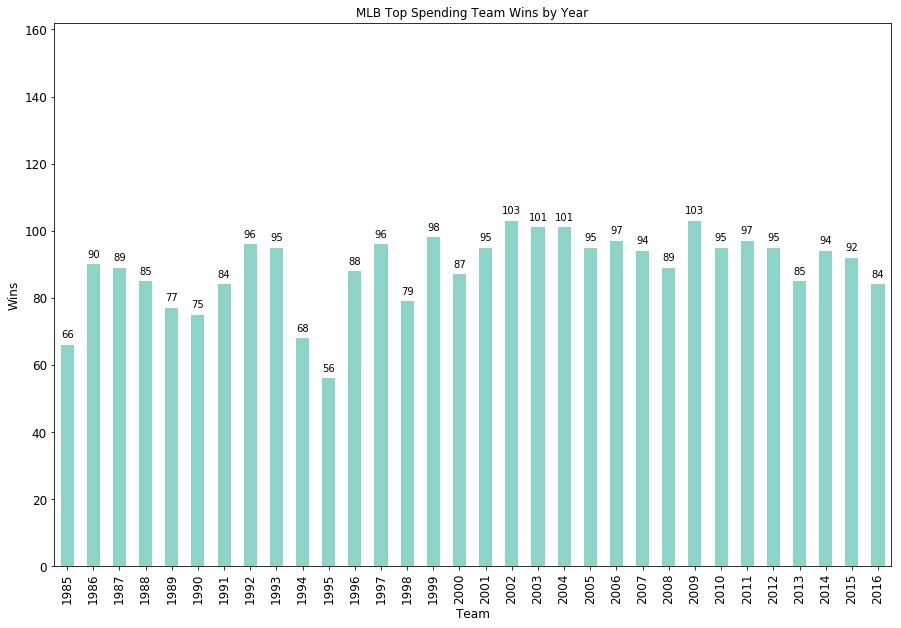

In [446]:
# Extract only the columns we need
df = df_raw.filter(items=['year', 'W'])
df_sort = df.sort_values(by=['year'])

# Color Scale
#color_list = plt.cm.Set3(np.linspace(0,0,1))
color_list = plt.cm.Set3([0])

# Plot a bar chart, and label the axes
ax = df_sort['W'].plot(kind='bar', title ="MLB Top Spending Team Wins by Year", color=color_list, figsize=(15, 10), fontsize=12)


ax.set_xlabel("Team", fontsize=12)
ax.set_ylabel("Wins", fontsize=12)
ax.set_ylim(0,162)
for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()




In [447]:
# Top Spending Teams that recorded more than 90 wins

better90 = (df_raw[(df_raw.W >= 90)])


In [448]:
# Number of times Top Spending Team exceeded 90 wins (since 1984)
# Ans: 18

print (better90.shape[0])

18


In [449]:
# Percentage of times Top Spending Team exceeded 90 wins (since 1984)
# Ans: 56.25

print ((better90.shape[0]/df_raw.shape[0]*100))

56.25


#### Bar Chart Showing Spending Rank of World Series Winning Teams after 1984

We can visualize the Spending Rank of the Word Series Winning teams, after 1984, by looking at their spending ranks (1-Highest Spend, 32 - Lowest spend). The Data shows us that 

a) The Top spending team has won the World Series 5 times or 15.6% of the time. 

b) Teams that are in the group of Top 5 spenders in a year, have won the World Series 14 times or 45% of the time   

c) Teams that are in the group of Top 10 spenders in a year, have won the World Series 21 times or 68% of the time 

d) Teams that are in the group of Bottom 10 spenders in a year, have won the World Series 2 times or 6.5% of the time

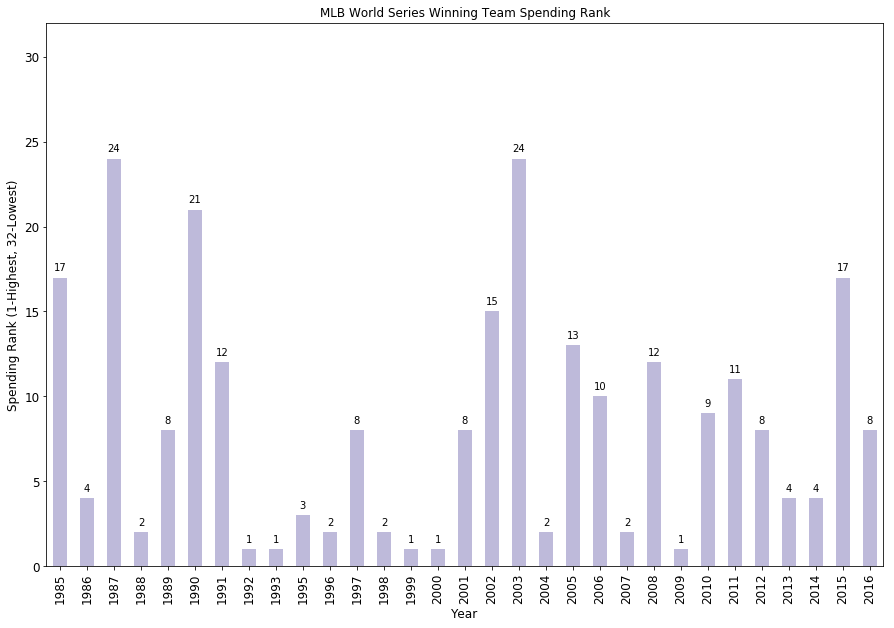

In [450]:
# Extract only the columns we need

df_ws_sort = df_ws.sort_values(by=['year'])

# Color Scale
color_list = plt.cm.Set3([2])

# Plot a bar chart, and label the axes
ax = df_ws_sort['yearRank'].plot(kind='bar', title ="MLB World Series Winning Team Spending Rank", color=color_list, figsize=(15, 10), fontsize=12)
ax.set_ylabel("Spending Rank (1-Highest, 32-Lowest)", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylim(0,32)
for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()




#### Bar Chart showing the Average Number of Wins for each Team, based on Spending Rank (After 1984)

We can visualize the Average number of Wins, for the all Teams, after the Year 1984, based on their spending rank. This can be used to show if Higher spending teams, do indeed perform better than lower spending teams. 

From the graph we can see that the Top Spending teams to indeed perform better than the Lower Spending teams. However the separtion is not very large. Teams that rank 2 through 6 in spending, perform roughly the same (Approximately 85 wins on average). Teams that rank 9 through 16 perform roughly the same (Approximatley 80 wins on average)  

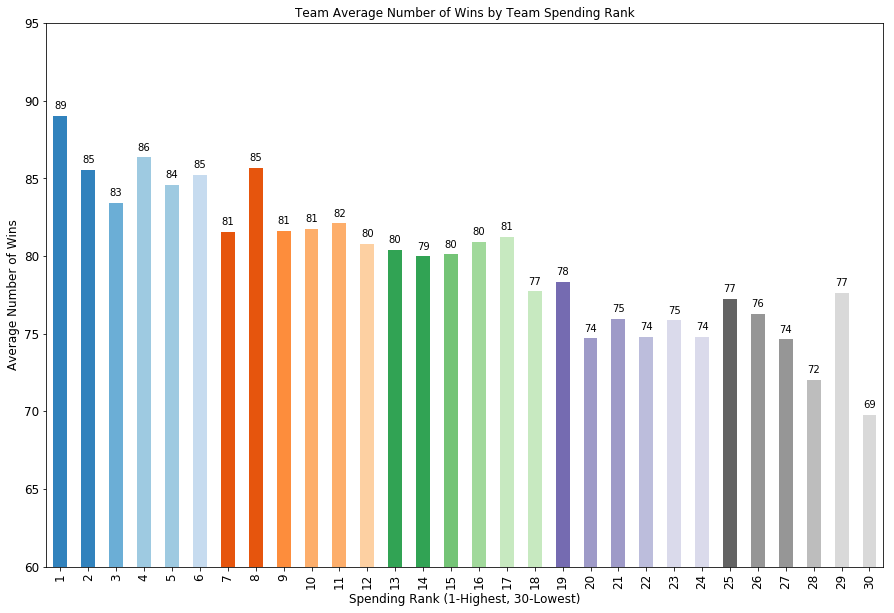

In [451]:
# Plot a bar chart, and label the axes

color_list = plt.cm.tab20c(np.linspace(0,1,30))

ax = df_avg['avgWin'].plot(kind='bar', title ="Team Average Number of Wins by Team Spending Rank", color=color_list , figsize=(15, 10), fontsize=12)
ax.set_ylabel("Average Number of Wins", fontsize=12)
ax.set_xlabel("Spending Rank (1-Highest, 30-Lowest)", fontsize=12)
ax.set_ylim(60,95)
for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

#### Bar Chart showing the Salary Expenditure for each Team, based on Spending Rank (After 1984)

We can visualize the Average Salary Expenditure, for the all Teams, after the Year 1984, based on their spending rank. This can be used to show the gulf in spending between teams. It can also be used to determine how much of a differnce in team performance is observed, based on spending. 

From the graph we can see that the Average Salary Expenditure, for the Top spending team is a lot higher than that of lower spending teams. There is an increase in roughly 50% in expenditure between the fifth rank team, and the top ranked team, in terms of spending. 

However this does necessarily equate to a much more significant increase in games won. The data shows that the fifth ranked team, in terms of spending, wins about 5 games less per season, on average, than the Top ranked team.

The Twelfth ranked team, in terms of spending, wins about 9 games less per season, on average, than the Top ranked team. However the Twelfth ranked team spends roughly half of the amount the Top ranked team spends on average, per season. 

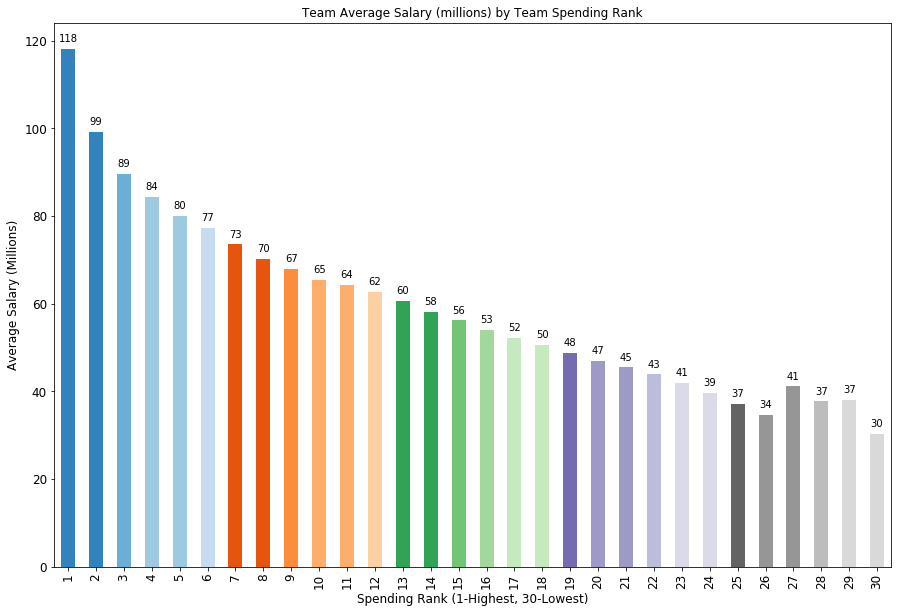

In [452]:
# Plot a bar chart, and label the axes
 
color_list = plt.cm.tab20c(np.linspace(0,1,30))

ax = df_avg['avgSal'].plot(kind='bar', title ="Team Average Salary (millions) by Team Spending Rank", color=color_list , figsize=(15, 10), fontsize=12)
ax.set_ylabel("Average Salary (Millions)", fontsize=12)
ax.set_xlabel("Spending Rank (1-Highest, 30-Lowest)", fontsize=12)
#ax.set_ylim(60,95)
for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()